In [1]:
from utils import *
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
imgs_4k = get_folder(callback=clear_output)
imgs_1080bc = get_folder(folder='./images/1080P/bicubic/', callback=clear_output)
imgs_720bc = get_folder(folder='./images/720P/bicubic/', callback=clear_output)

199 / 200


## DCT Explore

(2160, 3840)


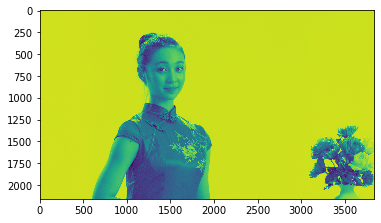

In [3]:
img = np.float32(imgs_4k[10, :, :, 0])
print(img.shape)
plt.imshow(img)

(2160, 3840)


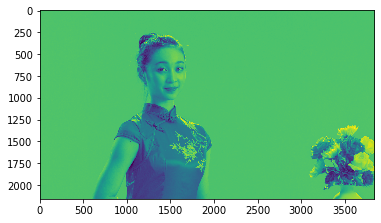

In [4]:
img = np.float32(imgs_4k[10, :, :, 1])
print(img.shape)
plt.imshow(img)

(2160, 3840)


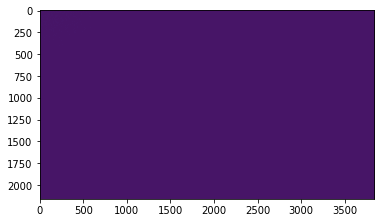

In [5]:
img_dct = cv2.dct(img)
print(img_dct.shape)
plt.imshow(img_dct)

In [6]:
def vis_hist(img, thresholds = (100, 1000, 10000), level=None, display=True):
    tmp = img.flatten()

    if thresholds is None:
        hst = plt.hist(tmp, bins=100)[0]
    else:
        num_plots = len(thresholds) + 1
        
        plt.figure(figsize=[12, 4 * ((num_plots + 1) // 2)])
        hsts = []
        
        for idx in range(num_plots):
            if level == idx:
                break
            plt.subplot((num_plots + 1) // 2, 2, idx + 1)
            if idx == 0:
                hst = plt.hist(tmp[abs(tmp) < thresholds[0]], bins=100)[0]
            elif idx == num_plots - 1:
                hst = plt.hist(tmp[abs(tmp) >= thresholds[idx - 1]], bins=100)[0]
            else:
                hst = plt.hist(tmp[(abs(tmp) >= thresholds[idx - 1]) & (abs(tmp) < thresholds[idx])], bins=100)
    if display:
        plt.show()

SyntaxError: invalid syntax (<ipython-input-6-4d6b4a9693c2>, line 21)

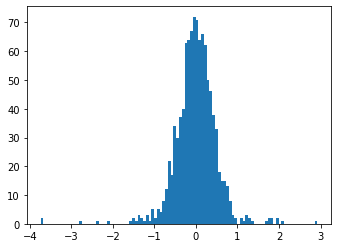

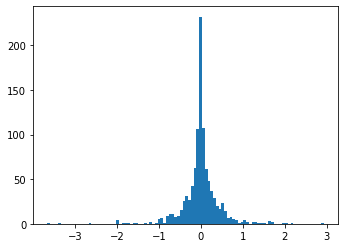

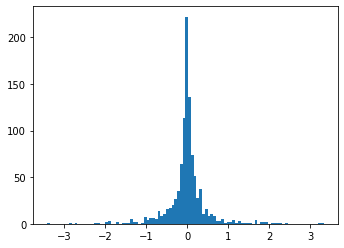

In [88]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_4k[10, :tile, :tile, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[10, :tile, :tile, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_720bc[10, :tile, :tile, 0])), (10,), 1)

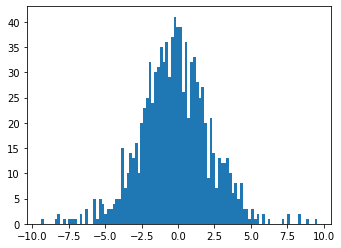

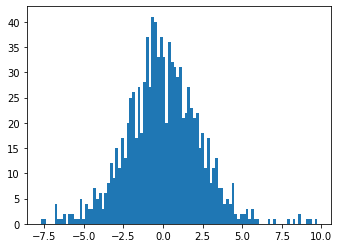

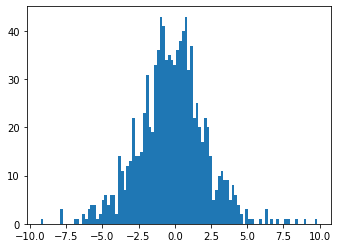

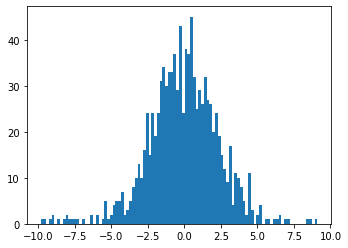

In [76]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*0:tile*1, tile*0:tile*1, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*1:tile*2, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*0:tile*1, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_4k[0, tile*1:tile*2, tile*0:tile*1, 0])), (10,), 1)

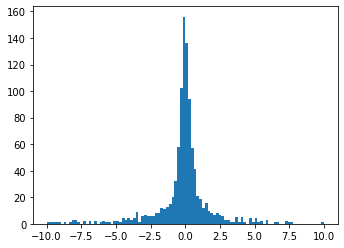

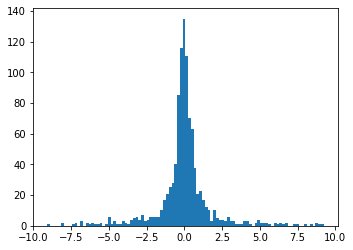

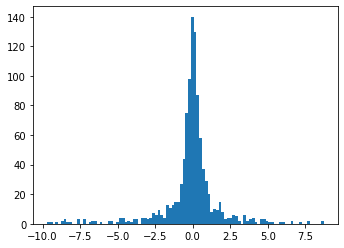

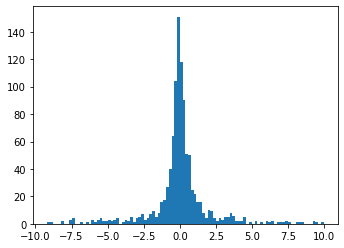

In [77]:
tile = 32
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*0:tile*1, tile*0:tile*1, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*1:tile*2, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*0:tile*1, tile*1:tile*2, 0])), (10,), 1)
vis_hist(cv2.dct(np.float32(imgs_1080bc[0, tile*1:tile*2, tile*0:tile*1, 0])), (10,), 1)

In [7]:
from DCT_Judger import *

In [11]:
dct_hist_union(imgs_4k[0, :, :, 0], 64)
plt.show()

KeyboardInterrupt: 

In [33]:
def vis_hist_all_tile(img, tile, n=10, bins=25, threshold=10, channel=0):
    plt.figure(figsize=(36, 24))
    n = min(img.shape[0] // tile, img.shape[1] // tile, n)
    stds = []
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i*n+j+1)
            if len(img.shape) < 3:
                dct = cv2.dct(np.float32(img[tile*i:tile*(i+1), tile*j:tile*(j+1)])).flatten()
            else:
                dct = cv2.dct(np.float32(img[tile*i:tile*(i+1), tile*j:tile*(j+1), channel])).flatten()
            dct = dct[abs(dct) < threshold]
            stds.append(np.std(dct))
            plt.hist(dct, bins=bins)
    return stds

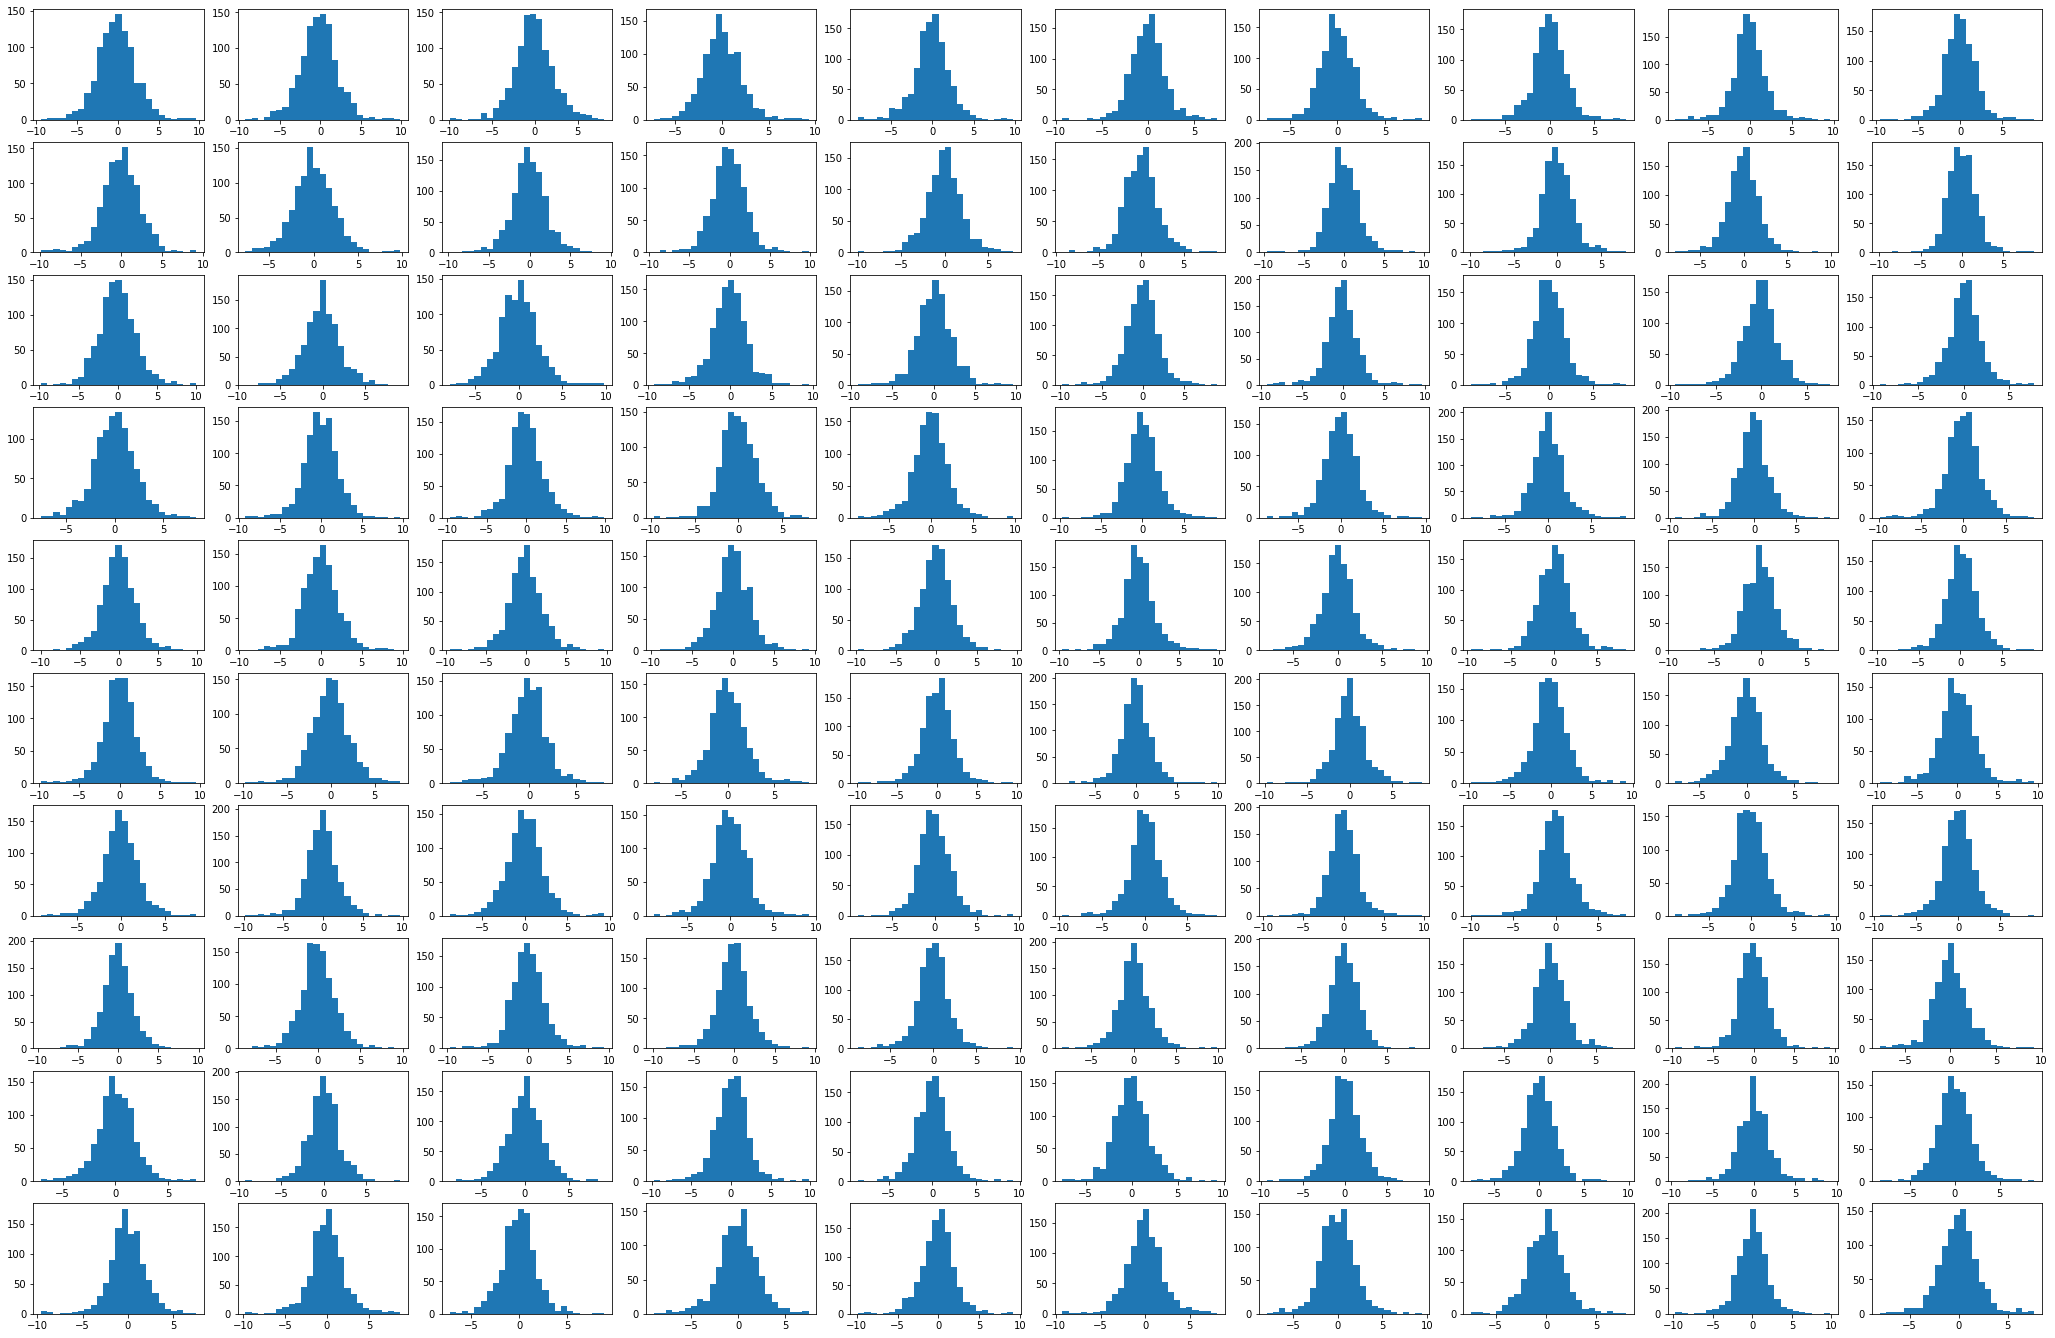

(array([ 3.,  8., 15., 17., 14., 18., 11.,  7.,  2.,  5.]),
 array([1.7915257, 1.8527681, 1.9140104, 1.9752527, 2.0364952, 2.0977376,
        2.15898  , 2.2202222, 2.2814646, 2.342707 , 2.4039493],
       dtype=float32),
 <a list of 10 Patch objects>)

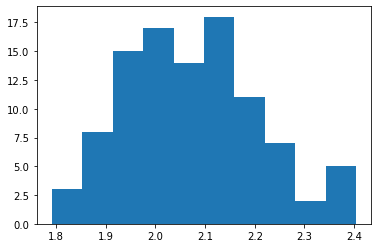

In [34]:
stds = vis_hist_all_tile(imgs_4k[0, :, :, 0], 32)
plt.show()
plt.figure()
plt.hist(stds)

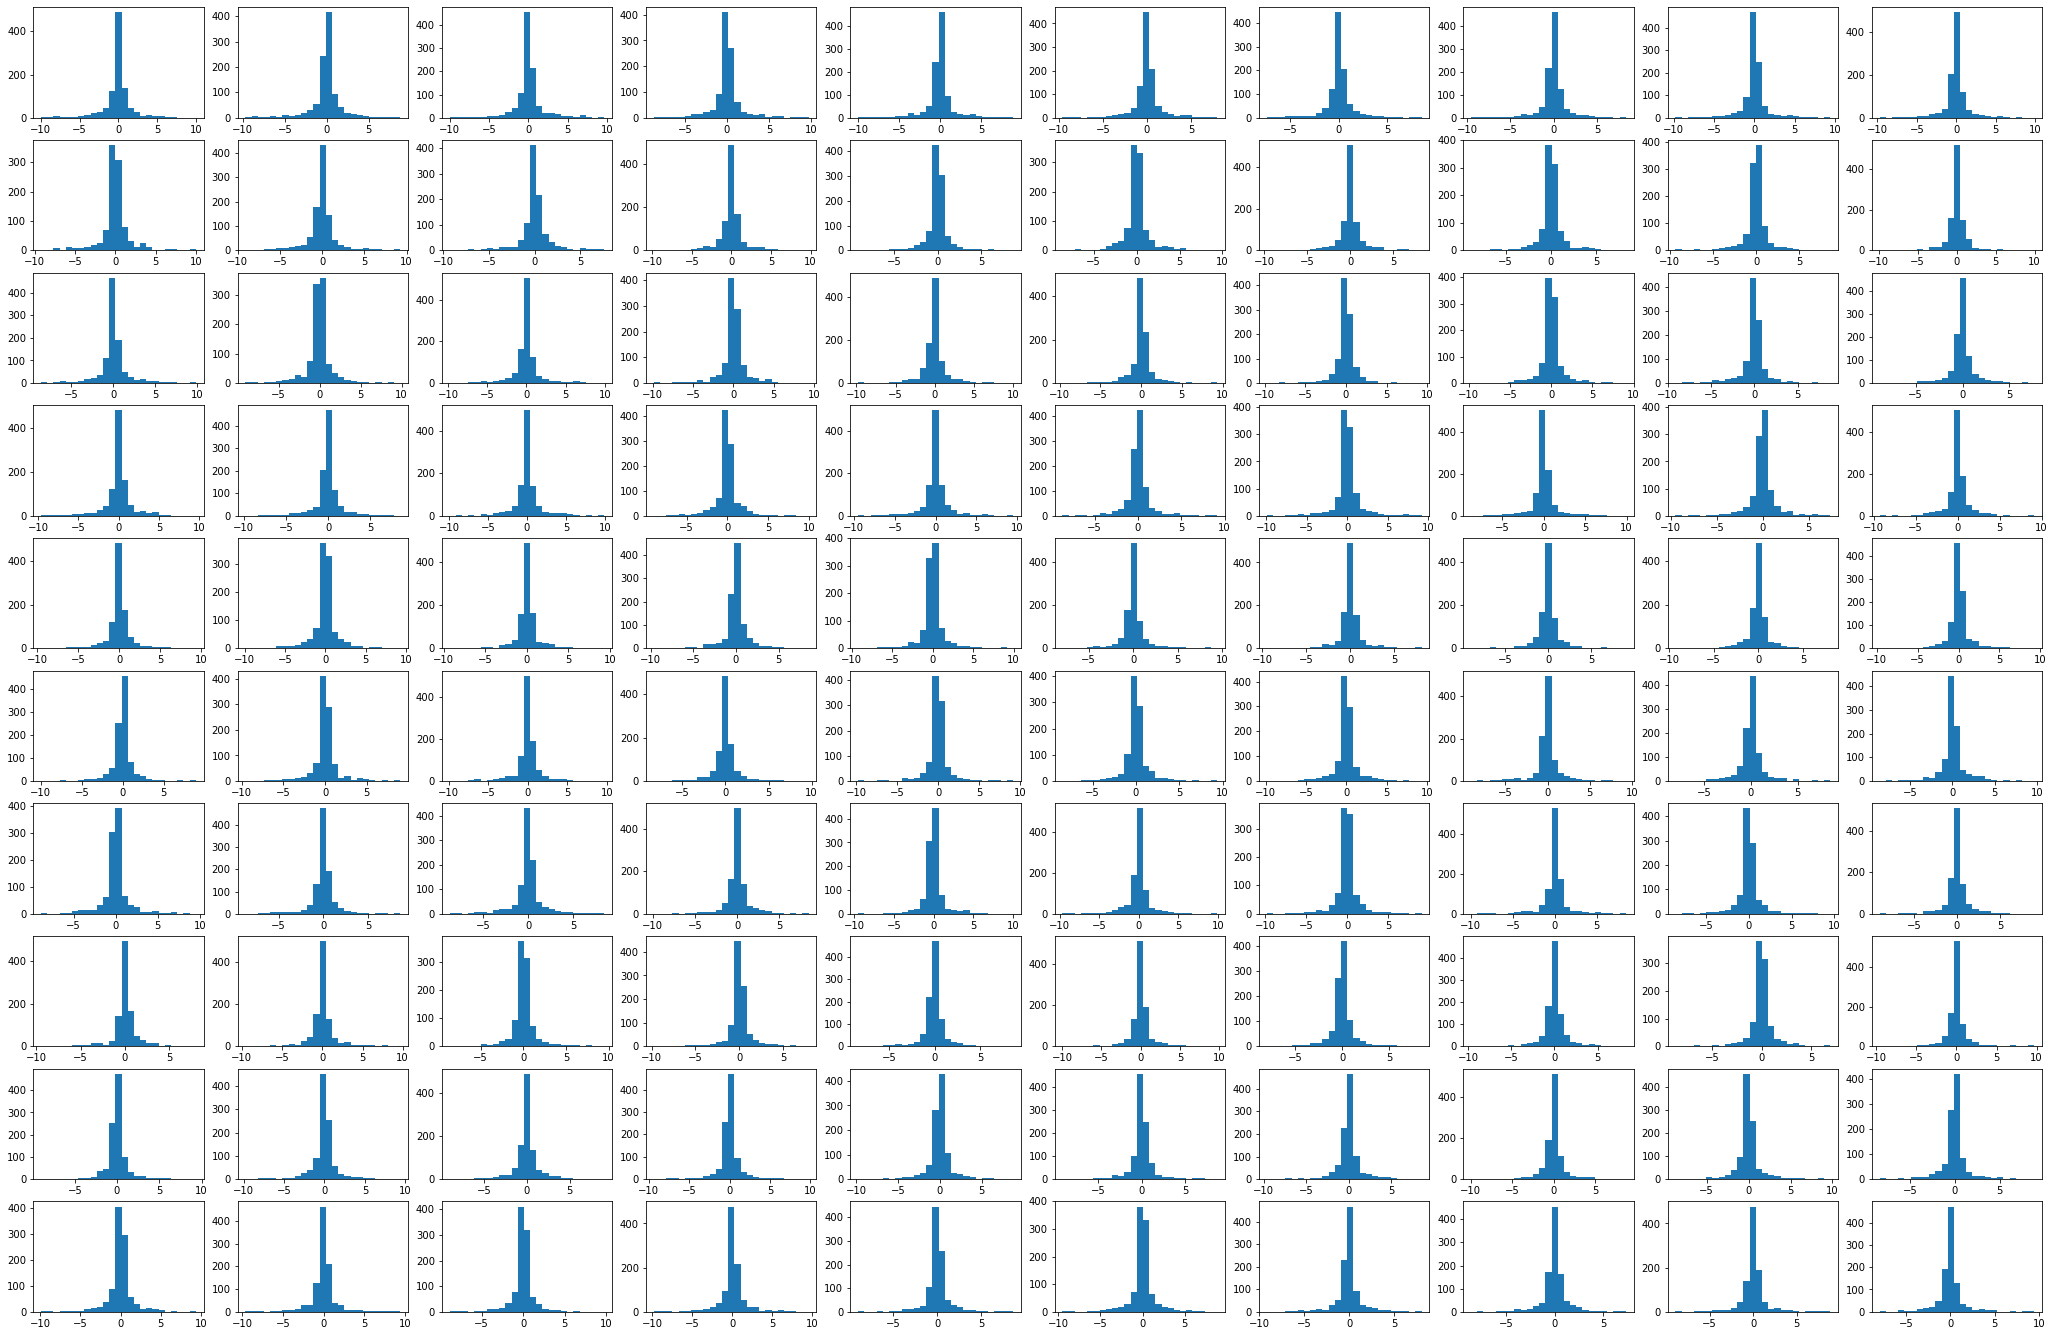

(array([ 8., 12., 17., 20., 15., 11.,  9.,  3.,  3.,  2.]),
 array([1.364843 , 1.427924 , 1.4910051, 1.5540861, 1.6171671, 1.680248 ,
        1.743329 , 1.8064101, 1.8694911, 1.9325721, 1.9956532],
       dtype=float32),
 <a list of 10 Patch objects>)

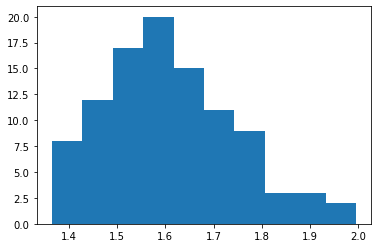

In [35]:
stds = vis_hist_all_tile(imgs_1080bc[0, :, :, 0], 32)
plt.show()
plt.figure()
plt.hist(stds)

## With Reference

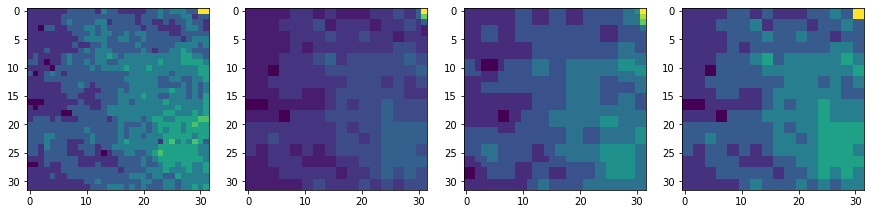

In [102]:
idx = 20

img_4k = imgs_4k[idx, :, :, 0]
img_1080bc = imgs_1080bc[idx, :, :, 0]
img_720bc = imgs_720bc[idx, :, :, 0]
img_ref = cv2.resize(down_sample(img_4k, 2), None, fx=2, fy=2, interpolation=cv2.INTER_AREA)

tile = 32
tile_4k = img_4k[:tile, :tile]
tile_1080bc = img_1080bc[:tile, :tile]
tile_720bc = img_720bc[:tile, :tile]
tile_ref = img_ref[:tile, :tile]

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
plt.imshow(tile_4k)
plt.subplot(1, 4, 2)
plt.imshow(tile_1080bc)
plt.subplot(1, 4, 3)
plt.imshow(tile_720bc)
plt.subplot(1, 4, 4)
plt.imshow(tile_ref)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


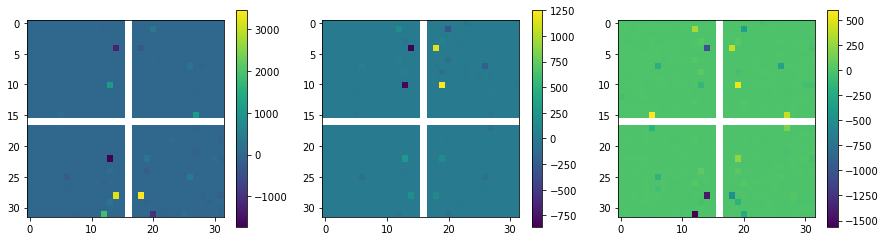

In [103]:
dct_ref = cv2.dct(np.float32(tile_ref))
dct_4k_rel = cv2.dct(np.float32(tile_4k)) / dct_ref
dct_1080bc_rel = cv2.dct(np.float32(tile_1080bc)) / dct_ref
dct_720bc_rel = cv2.dct(np.float32(tile_720bc)) / dct_ref
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(dct_4k_rel)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(dct_1080bc_rel)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(dct_720bc_rel)
plt.colorbar()

(array([  3.,   6.,   5.,   4.,  10.,   5.,   6.,  12.,  19.,  36.,  56.,
        135., 267., 148.,  72.,  40.,  20.,  13.,  10.,  10.,   4.,   3.,
          6.,   3.,   2.]),
 array([-9.590714  , -8.818748  , -8.0467825 , -7.274816  , -6.50285   ,
        -5.7308836 , -4.9589176 , -4.1869516 , -3.4149854 , -2.6430192 ,
        -1.8710531 , -1.099087  , -0.32712087,  0.4448453 ,  1.2168114 ,
         1.9887775 ,  2.7607436 ,  3.5327098 ,  4.304676  ,  5.076642  ,
         5.848608  ,  6.6205745 ,  7.3925405 ,  8.164507  ,  8.936473  ,
         9.708439  ], dtype=float32),
 <a list of 25 Patch objects>)

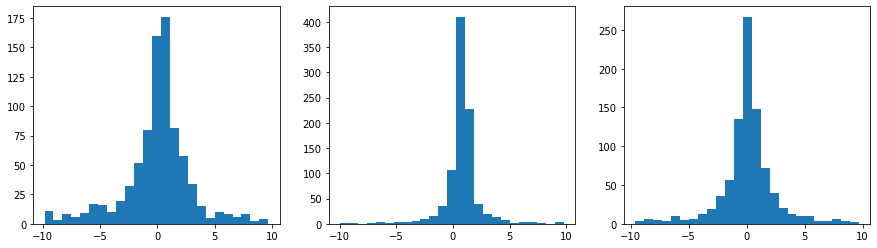

In [104]:
threshold = 10

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
tmp = dct_4k_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)
plt.subplot(1, 3, 2)
tmp = dct_1080bc_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)
plt.subplot(1, 3, 3)
tmp = dct_720bc_rel.flatten()
plt.hist(tmp[abs(tmp) < threshold], bins=25)